* This Notebook is designed specifically for modeling part [No much analysis and EDA is included] , 
* direct to the point Deeplearning Models

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile 
import pandas as pd


In [2]:
# !pip install missingno
import missingno as msno

# Reading Data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score

import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pump-sensor-data/sensor.csv


<AxesSubplot:>

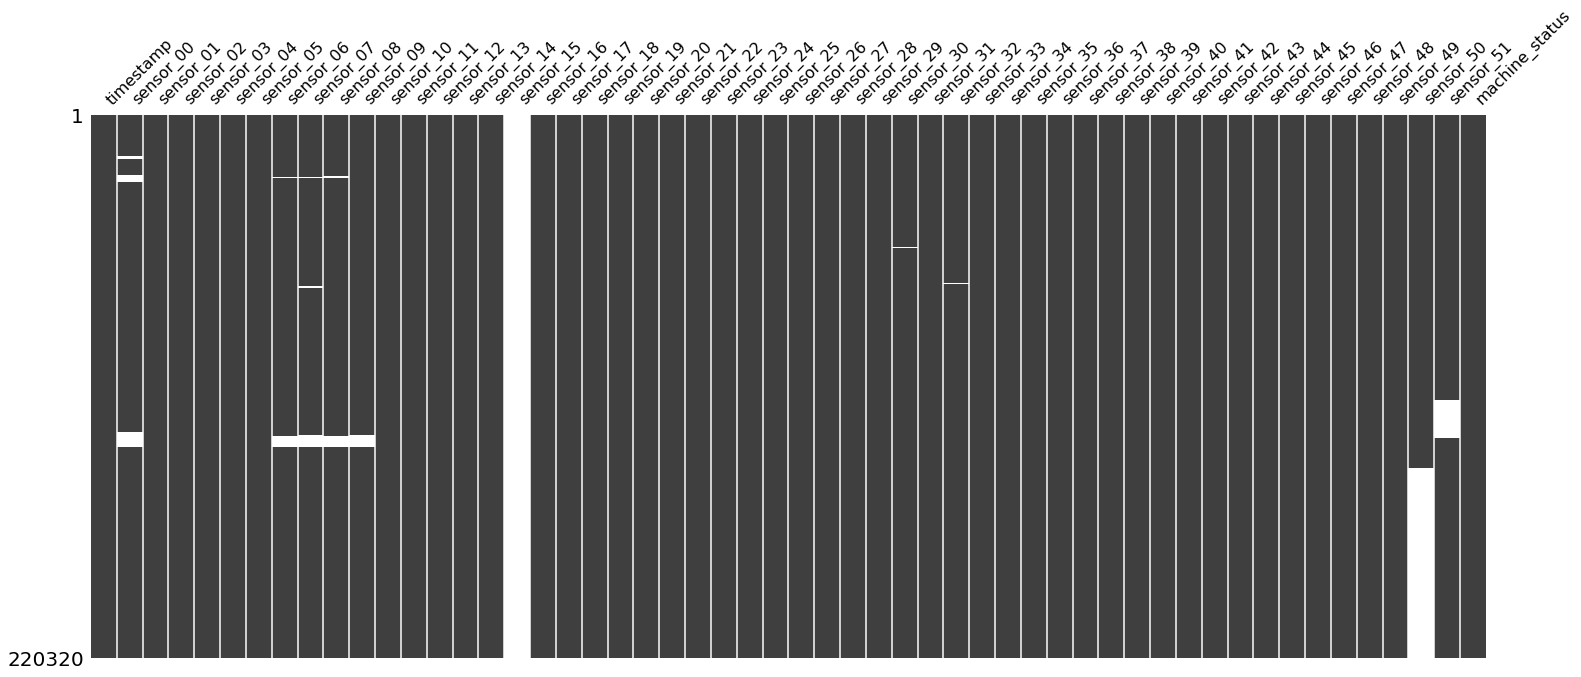

In [4]:
df = pd.read_csv(os.path.join(dirname, filename), index_col=0)
msno.matrix(df, labels=True, sparkline=False)

In [5]:
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


<AxesSubplot:>

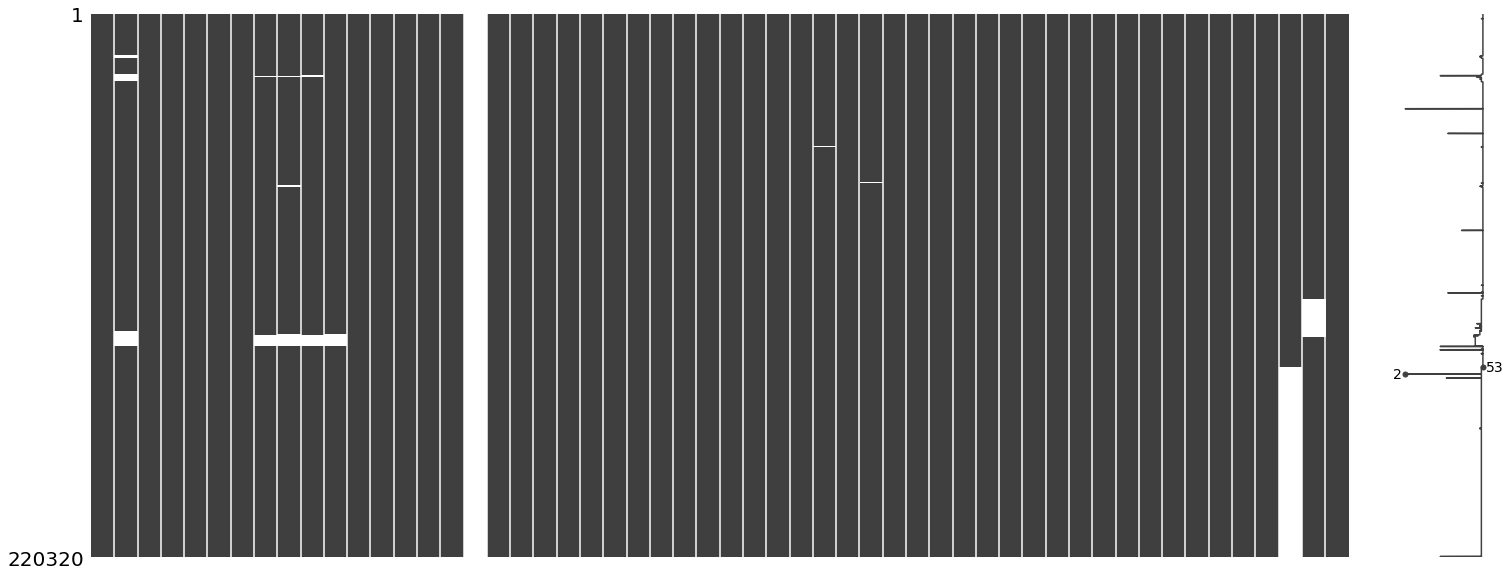

In [6]:
msno.matrix(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [8]:
df[['sensor_00']].loc[17150:17180] #17160 null index of sensor_00

,sensor_00
17150,1.533738
17151,1.349769
17152,1.290741
17153,1.220891
17154,0.000000
17155,0.000000
17156,0.000000
17157,0.000000
17158,0.000000
17159,0.000000


In [9]:
# I will consider 0.0 reading as null -> may be sensor is damaged then removed for maintainance

In [10]:
df = df.replace(0 , np.NaN)

<AxesSubplot:>

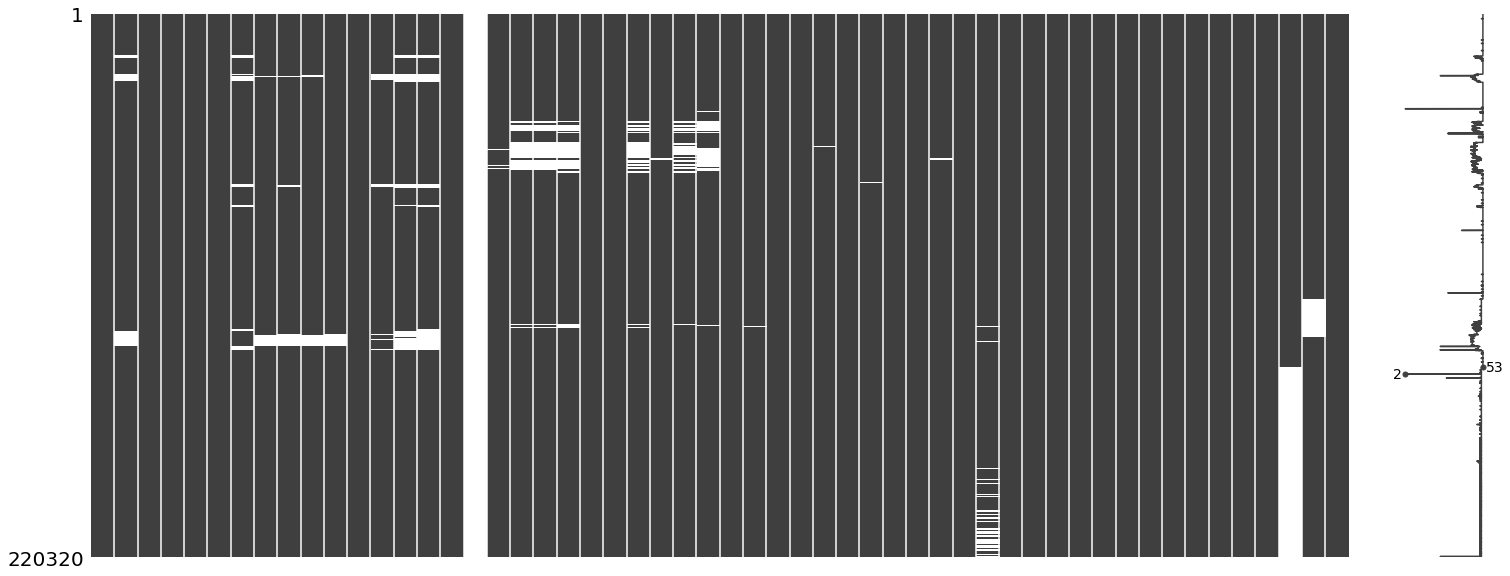

In [11]:
#lets check again what is the missing values 
msno.matrix(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210093 non-null  float64
 2   sensor_01       219947 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       212264 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214863 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215724 non-null  float64
 11  sensor_10       219975 non-null  float64
 12  sensor_11       216248 non-null  float64
 13  sensor_12       207244 non-null  float64
 14  sensor_13       205159 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [13]:
# for the column with all nulls value[sensor 15] _ Remove , same for the one before before last[sensor 50] 

In [14]:
df.drop(['sensor_50' , 'sensor_15' , 'sensor_37'] , axis = 1 , inplace = True)

In [15]:
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51',
       'machine_status'],
      dtype='object')

In [16]:
# for the the otheres we can use fill as last non-null value from the same column , sensor so its more logic to take last value ..
# consider that sensor was having an issue and its giving the same reading for these time steps

In [17]:
df.fillna(method = 'ffill' , inplace = True)

In [18]:
df[['sensor_00']].loc[17150:17180] #17160 null index of sensor_00 , checking the ffill

,sensor_00
17150,1.533738
17151,1.349769
17152,1.290741
17153,1.220891
17154,1.220891
17155,1.220891
17156,1.220891
17157,1.220891
17158,1.220891
17159,1.220891


<AxesSubplot:>

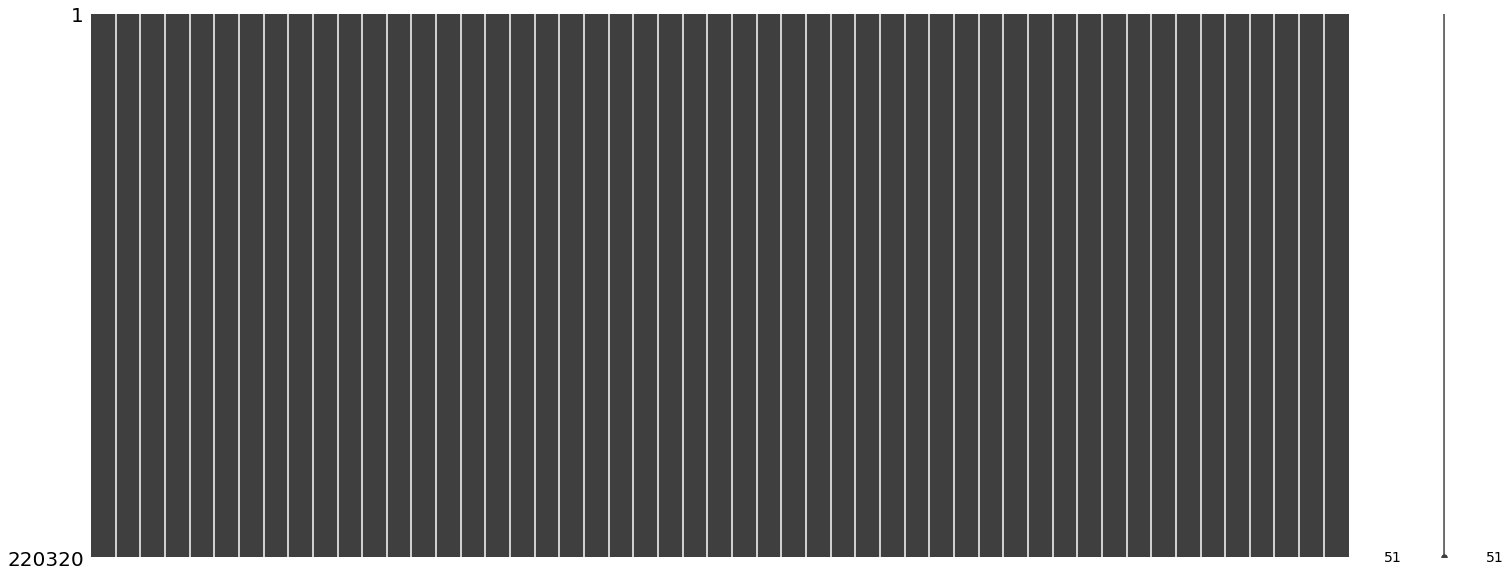

In [19]:
msno.matrix(df) #الحمدلله

In [20]:
#check if the status is not all same value
df.machine_status.unique() 

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [21]:
#this really good the same assumptions about data I have done is here , still we can move forward - no worries

# Normalizing

In [22]:
def normalize_series(series):
    original_max = max(series) #you will need it on the denormalization
    original_min = min(series)
    norm_series = (series - original_min) / (original_max - original_min)
    return norm_series , original_max , original_min

In [23]:
#extracting time series out of the dataframe

In [24]:
df.columns 

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51',
       'machine_status'],
      dtype='object')

In [25]:
#of course it will be multivarient type
series_df = df[list(df.columns[2:-1])]

In [26]:
series_df

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
1,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
3,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
4,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921
220316,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921
220317,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602
220318,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,234.0856


In [27]:
series = series_df.to_numpy()

In [28]:
series

array([[ 47.09201   ,  53.2118    ,  46.31076   , ..., 157.9861    ,
         67.70834   , 201.3889    ],
       [ 47.09201   ,  53.2118    ,  46.31076   , ..., 157.9861    ,
         67.70834   , 201.3889    ],
       [ 47.35243   ,  53.2118    ,  46.39757   , ..., 155.9606    ,
         67.12963   , 203.7037    ],
       ...,
       [ 47.69964981,  50.52083   ,  43.14236069, ..., 217.3032    ,
        155.3819    , 232.0602    ],
       [ 47.69964981,  50.52083206,  43.14236069, ..., 222.5116    ,
        153.9352    , 234.0856    ],
       [ 47.69964981,  50.52083206,  43.14236069, ..., 227.4306    ,
        150.463     , 234.0856    ]])

In [29]:
series.shape

(220320, 48)

In [30]:
#sensor_00
series[:, 0]

array([47.09201   , 47.09201   , 47.35243   , ..., 47.69964981,
       47.69964981, 47.69964981])

In [31]:
len(series[: , 0]) #same as the datarame 0 -> 00 and 1 -> 01 .. [note that we have deleted 3 sensors]

220320

In [32]:
sesnors_maxmin = {}
norm_series = series.copy()
for i in range(48):  # Cambia 49 a 48
    norm_series[: , i] , series_max , series_min = normalize_series(series[: , i])
    sesnors_maxmin[i] = {'max' : round(series_max , 10) , 'min' : round(series_min , 10)}

In [33]:
sesnors_maxmin

{0: {'max': 56.72743, 'min': 22.43924},
 1: {'max': 56.03299, 'min': 33.15972},
 2: {'max': 48.22049, 'min': 31.64062},
 3: {'max': 800.0, 'min': 2.798032},
 4: {'max': 99.99988, 'min': 0.000118766},
 5: {'max': 22.25116, 'min': 0.01446759},
 6: {'max': 23.59664, 'min': 0.007233796},
 7: {'max': 24.34896, 'min': 0.02893518},
 8: {'max': 25.0, 'min': 0.007233796},
 9: {'max': 76.10686, 'min': 0.000367043},
 10: {'max': 60.0, 'min': 0.0001049915},
 11: {'max': 45.0, 'min': 0.0001102411},
 12: {'max': 31.18755, 'min': 0.000100941},
 13: {'max': 500.0, 'min': 32.40955},
 14: {'max': 739.7415, 'min': 0.0001202361},
 15: {'max': 599.9999389648, 'min': 0.0001043597},
 16: {'max': 4.87325, 'min': 0.0001007909},
 17: {'max': 878.9179, 'min': 2.660331},
 18: {'max': 448.9079, 'min': 4.228029},
 19: {'max': 1107.526, 'min': 95.52766},
 20: {'max': 594.0611, 'min': 2.082896},
 21: {'max': 1227.564, 'min': 4.955038},
 22: {'max': 1000.0, 'min': 2.600305},
 23: {'max': 839.575, 'min': 3.999763},
 24

# Denormalizing

In [34]:
def denormailze_series(series , original_max , original_min):
    original_series = (series*(original_max - original_min))+ original_min
    return original_series

In [35]:
#exampel of denormalizing -> sensor_00
series[: , 4]

array([76.45975, 76.45975, 73.54598, ..., 67.29445, 65.09175, 65.45634])

In [36]:
#after normalization
norm_series[: , 4]

array([0.76459814, 0.76459814, 0.73546037, ..., 0.67294492, 0.65091787,
       0.65456378])

In [37]:
#lets denormalize the norm_seris[: , 4] -> for safy lets copy it to anther one
norm_series_copy = norm_series[: , 4].copy()
norm_series_copy

array([0.76459814, 0.76459814, 0.73546037, ..., 0.67294492, 0.65091787,
       0.65456378])

In [38]:
norm_series_copy = denormailze_series(norm_series_copy , sesnors_maxmin[4]['max'] ,sesnors_maxmin[4]['min'] )

In [39]:
norm_series_copy # yaaaay 

array([76.45975, 76.45975, 73.54598, ..., 67.29445, 65.09175, 65.45634])

# Splitting

In [40]:
norm_series.shape

(220320, 48)

In [41]:
#almost 50 features .. put on mind that this will not be visualized , just I will prove this by the follwing

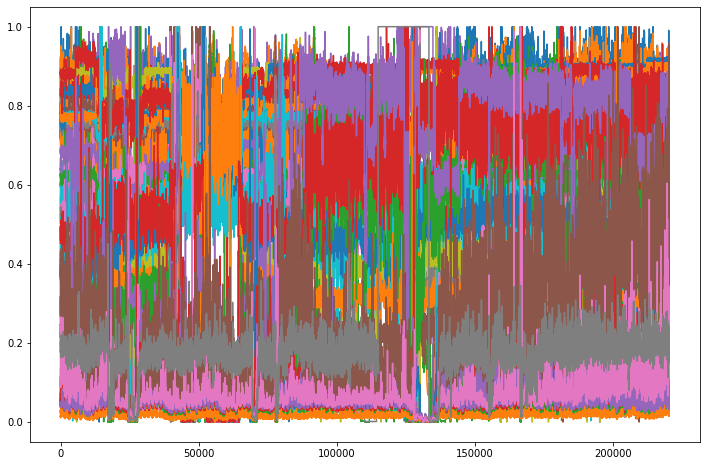

In [42]:
plt.figure(figsize = (12 , 8))
for i in range(48):
    plt.plot(norm_series[: , i])

plt.show()

In [43]:
#if you are interested sor much in one or two sensors

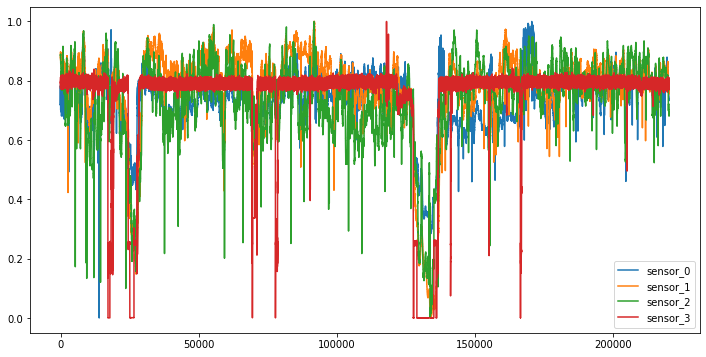

In [44]:
plt.figure(figsize = (12 , 6))
for i in range(4):
    plt.plot(norm_series[: , i] , label = 'sensor_' + str(i))

plt.legend()
plt.show()

In [45]:
norm_series

array([[0.71898721, 0.87665996, 0.88481635, ..., 0.2459459 , 0.09385329,
        0.17857144],
       [0.71898721, 0.87665996, 0.88481635, ..., 0.2459459 , 0.09385329,
        0.17857144],
       [0.72658224, 0.87665996, 0.89005221, ..., 0.24216205, 0.0925314 ,
        0.18095238],
       ...,
       [0.73670876, 0.75901303, 0.69371718, ..., 0.35675664, 0.29411756,
        0.21011906],
       [0.73670876, 0.75901312, 0.69371718, ..., 0.3664865 , 0.290813  ,
        0.21220233],
       [0.73670876, 0.75901312, 0.69371718, ..., 0.37567572, 0.28288179,
        0.21220233]])

In [46]:
def split_data(series , train_to_validate_ratio):
    split_size = int(len(series) * train_to_validate_ratio)
    return series[:split_size] , series[split_size:]

In [47]:
train_set , validate_set = split_data(norm_series , 0.8)

In [48]:
train_set.shape

(176256, 48)

In [49]:
validate_set.shape

(44064, 48)

In [50]:
#just further checking
norm_series.shape

(220320, 48)

In [51]:
norm_series

array([[0.71898721, 0.87665996, 0.88481635, ..., 0.2459459 , 0.09385329,
        0.17857144],
       [0.71898721, 0.87665996, 0.88481635, ..., 0.2459459 , 0.09385329,
        0.17857144],
       [0.72658224, 0.87665996, 0.89005221, ..., 0.24216205, 0.0925314 ,
        0.18095238],
       ...,
       [0.73670876, 0.75901303, 0.69371718, ..., 0.35675664, 0.29411756,
        0.21011906],
       [0.73670876, 0.75901312, 0.69371718, ..., 0.3664865 , 0.290813  ,
        0.21220233],
       [0.73670876, 0.75901312, 0.69371718, ..., 0.37567572, 0.28288179,
        0.21220233]])

# windowing

In [52]:
def windowed_dataset(series , window_size , batch_size , buffer_size):
    #converitng to tensors
    series = tf.data.Dataset.from_tensor_slices(series )
    #windowing
    series = series.window(window_size +1 ,  shift = 1 , drop_remainder = True)
    #flattening
    series = series.flat_map(lambda x: x.batch(window_size +1))
    #xs , ys
    series = series.map(lambda x: (x[:window_size] , x[-1])) #window_size -> x points ,,, last point as there output y
    #shuffling
    series = series.shuffle(buffer_size)
    #batching
    series = series.batch(batch_size)
    #returning
    return series

In [53]:
#No specific reason for the following just expermint with it
window_size = 20
batch_size = 64
buffer_size = 1000

In [54]:
train_dataset = windowed_dataset(train_set , window_size , batch_size , buffer_size)

# Modeling - selecting best Learning rate

In [55]:
# Ajusta la forma de entrada de tu modelo para que espere 48 en la última dimensión en lugar de 49
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters = 16 , kernel_size = 5 ,padding = 'causal' , strides = 1 , input_shape = [window_size , 48]),  # Cambia 49 a 48
    tf.keras.layers.LSTM(32 , return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(10 , activation = 'relu'),
    tf.keras.layers.Dense(1)
])



In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 16)            3856      
_________________________________________________________________
lstm (LSTM)                  (None, 20, 32)            6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 35,621
Trainable params: 35,621
Non-trainable params: 0
_________________________________________________________________


In [57]:
init_weights = model.get_weights()

In [58]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

In [59]:
model.compile(loss=tf.keras.losses.Huber() , #not sensntive to the otulier compared to mae or mse 
             optimizer = tf.keras.optimizers.SGD(momentum = 0.9) ,
             metrics = ['mae'])

In [60]:
history = model.fit(train_dataset , epochs = 50 , callbacks = [lr_schedule])

Epoch 1/50
2754/2754 [==============================] - 47s 13ms/step - loss: 0.1977 - mae: 0.5360
Epoch 2/50
2754/2754 [==============================] - 36s 13ms/step - loss: 0.1973 - mae: 0.5354
Epoch 3/50
2754/2754 [==============================] - 36s 13ms/step - loss: 0.1970 - mae: 0.5348
Epoch 4/50
2754/2754 [==============================] - 35s 13ms/step - loss: 0.1966 - mae: 0.5341
Epoch 5/50
2754/2754 [==============================] - 36s 13ms/step - loss: 0.1961 - mae: 0.5333
Epoch 6/50
2754/2754 [==============================] - 35s 13ms/step - loss: 0.1956 - mae: 0.5324
Epoch 7/50
2754/2754 [==============================] - 36s 13ms/step - loss: 0.1950 - mae: 0.5314
Epoch 8/50
2754/2754 [==============================] - 35s 13ms/step - loss: 0.1944 - mae: 0.5303
Epoch 9/50
2754/2754 [==============================] - 35s 13ms/step - loss: 0.1937 - mae: 0.5290
Epoch 10/50
2754/2754 [==============================] - 35s 13ms/step - loss: 0.1929 - mae: 0.5277
Epoch 11/

ValueError: x and y must have same first dimension, but have shapes (150,) and (50,)

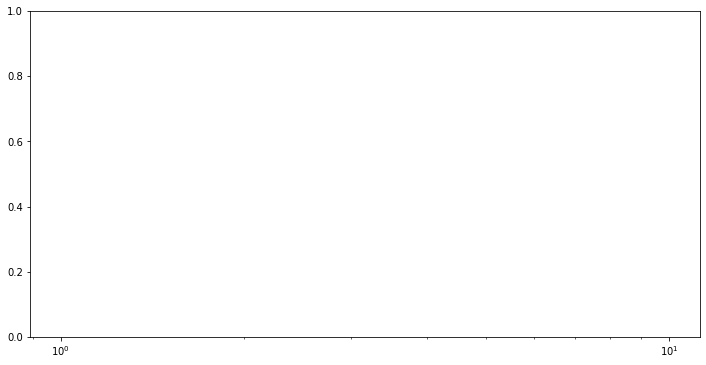

In [61]:
lr_list = 1e-8 * 10**(np.arange(150) / 20)
loss_list = history.history["loss"]

plt.figure(figsize = (12 , 6))
plt.semilogx(lr_list , loss_list)
plt.grid()
plt.show()

# Modeling


In [ ]:
class EarlyStoping(tf.keras.callbacks.Callback):
    def on_epooch_end(self ,epoch ,  logs = {}):
        if logs.get('mae') < 0.25 : #value is taken from first traing to select the best lr
            print('loss now is less than < 0.25' , )
            self.model.stop_training = True

In [ ]:
mycallback_ES = EarlyStoping()

In [ ]:
lr_selected = 5e-6
model_2 = model
model_2.set_weights(init_weights) #load_weights if the weights were saved in a file [not in ram]
model_2.compile(loss = tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.SGD(lr =lr_selected ,  momentum = 0.9),metrics = ['mae'])
history_2 = model_2.fit(train_dataset , epochs = 500 , callbacks = [mycallback_ES])

In [ ]:
#model_2.save('model_2.h5')

In [ ]:
#model_2 = tf.keras.models.load_model('model_2.h5')

In [ ]:
model_2.summary()

# Ploting actual vs forecast

In [ ]:
def model_forecast(model , series ,window_size, batch_size ):
    series = tf.data.Dataset.from_tensor_slices(series)
    series = series.window(window_size , shift = 1  , drop_remainder = True) #note only the window_size , this time its preparing the testing data not trainng
    series = series.flat_map(lambda x: x.batch(window_size))
    series = series.batch(batch_size)
    predictions = model.predict(series)
    return predictions

In [ ]:
predictions = model_forecast(model_2 , norm_series , window_size , batch_size)


In [ ]:
split_size = int(len(series) * 0.8) #remmeber the split ratio used before
val_period_predictions = predictions[split_size-window_size: -1 , 0] #sensor_00
results = np.array(val_period_predictions).squeeze()

In [ ]:
predictions.shape

In [ ]:
results.shape

In [ ]:
val_period_predictions.shape

In [ ]:
validate_set[: , 0].shape

In [ ]:
#note that If the whole series is passed there will be no point of plotting the actual and forecast [it will be not reeadable]
#sensor_00
plt.figure(figsize = (12 , 6))
plt.plot(validate_set[: , 0] , 'b' , label = 'Actual') 
plt.plot(results , 'orange' , label = 'Forecast')
plt.legend()
plt.show()

# MAE and MSE

In [ ]:
print('sensor_00 MAE:' )
np.mean(tf.keras.metrics.mean_absolute_error(validate_set[: , 0] , results))

In [ ]:
print('sensor_00 MSE:')
np.mean(tf.keras.metrics.mean_squared_error(validate_set[: , 0] , results))